# **Tesla & GameStop Stock & Revenue Analysis**

### Setup & Imports

#### We import libraries for stock data, web scraping, and plotting.

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Question 1 – Tesla Stock Data

- Create a ticker object for Tesla (TSLA).
- Use history(period="max") to get full stock history.
- Reset the index and display the first 5 rows.

In [3]:
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 – Tesla Revenue Data

- Use requests to download HTML from the URL
- Parse HTML using BeautifulSoup
- Extract Tesla Revenue table into a DataFrame with columns Date and Revenue
- Clean the Revenue column by removing commas and dollar signs, drop nulls or empty strings
- Display last 5 rows

In [8]:
url_tesla_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url_tesla_revenue).text

soup = BeautifulSoup(html_data, "html.parser")


tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue.tail()


,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


In [10]:
tesla_revenue.head()


,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


### Question 3 – GameStop Stock Data

- Create ticker object for GameStop (GME)
- Use history (period="max") for stock data
- Reset index and display first 5 rows

In [11]:
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 – GameStop Revenue Data

- Download webpage with GameStop revenue table
- Parse HTML using BeautifulSoup
- Extract table into DataFrame and clean Revenue column
- Display last 5 rows

In [15]:
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url_gme_revenue).text

soup_gme = BeautifulSoup(html_data_2, "html.parser")


gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)

gme_revenue.tail()


,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Define the Graph Function

In [20]:
def make_graph(stock_data, revenue_data, stock):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=.3
    )

    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-06-14']

    fig.add_trace(
        go.Scatter(
            x=stock_data_specific['Date'],
            y=stock_data_specific['Close'].astype(float),
            name="Share Price"
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Bar(
            x=revenue_data_specific['Date'],
            y=revenue_data_specific['Revenue'].astype(float),
            name="Revenue"
        ),
        row=2, col=1
    )

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    fig.update_layout(
        showlegend=False,
        height=900,
        title=f"{stock} Stock Price and Revenue (up to June 2021)",
        xaxis_rangeslider_visible=True
    )
    fig.show()


## Question 5 – Plot Tesla Stock Graph

- Use the make_graph function to plot Tesla stock vs revenue
- Graph will show data up to June 2021

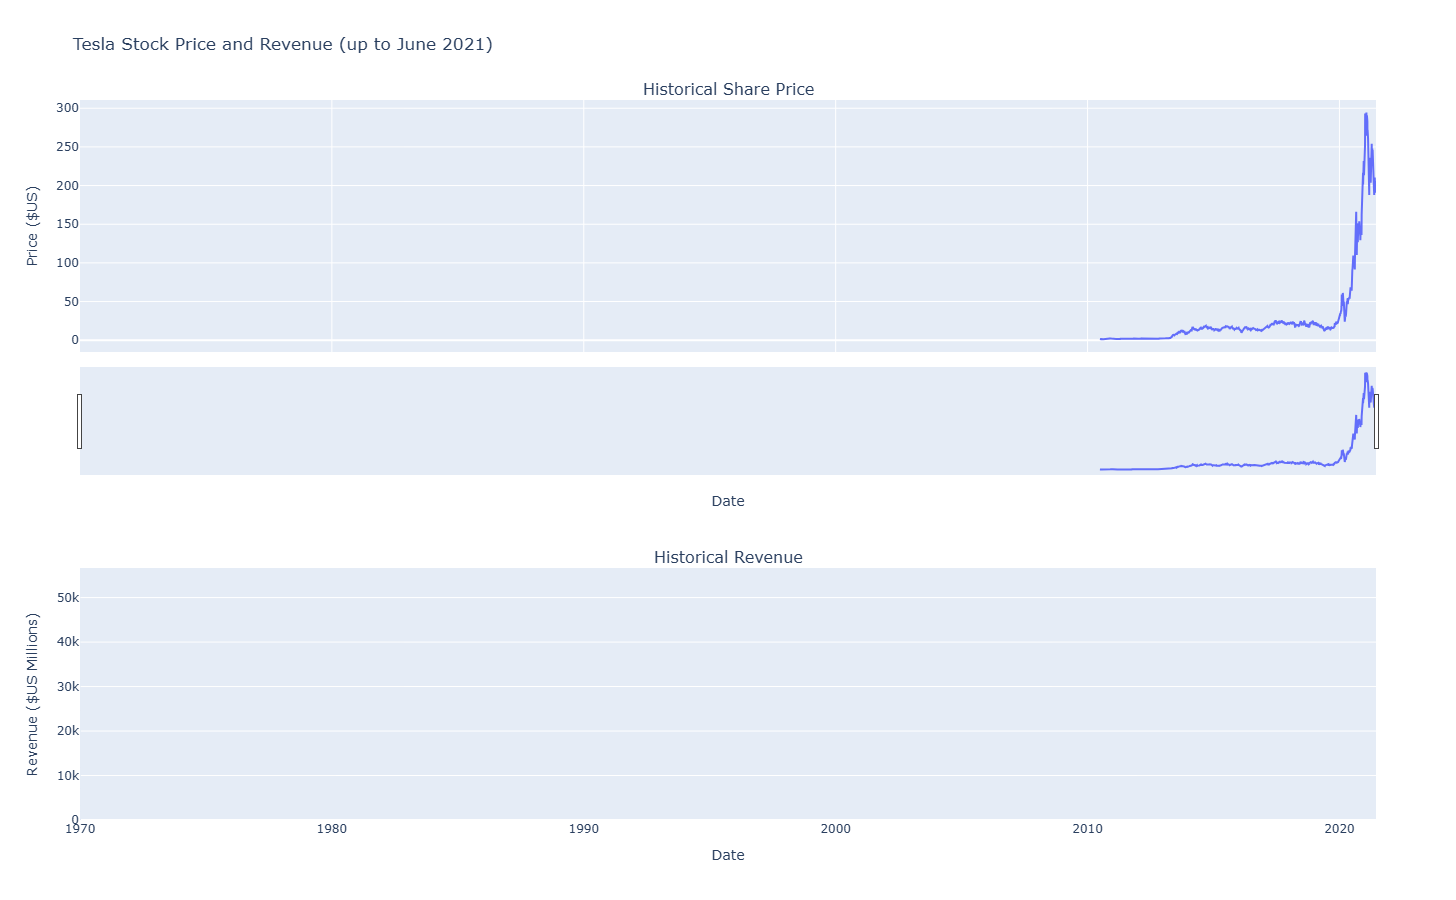

In [23]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


### Question 6 – Plot GameStop Stock Graph

- Use the make_graph function to plot GameStop stock vs revenue
- Graph will show data up to June 2021

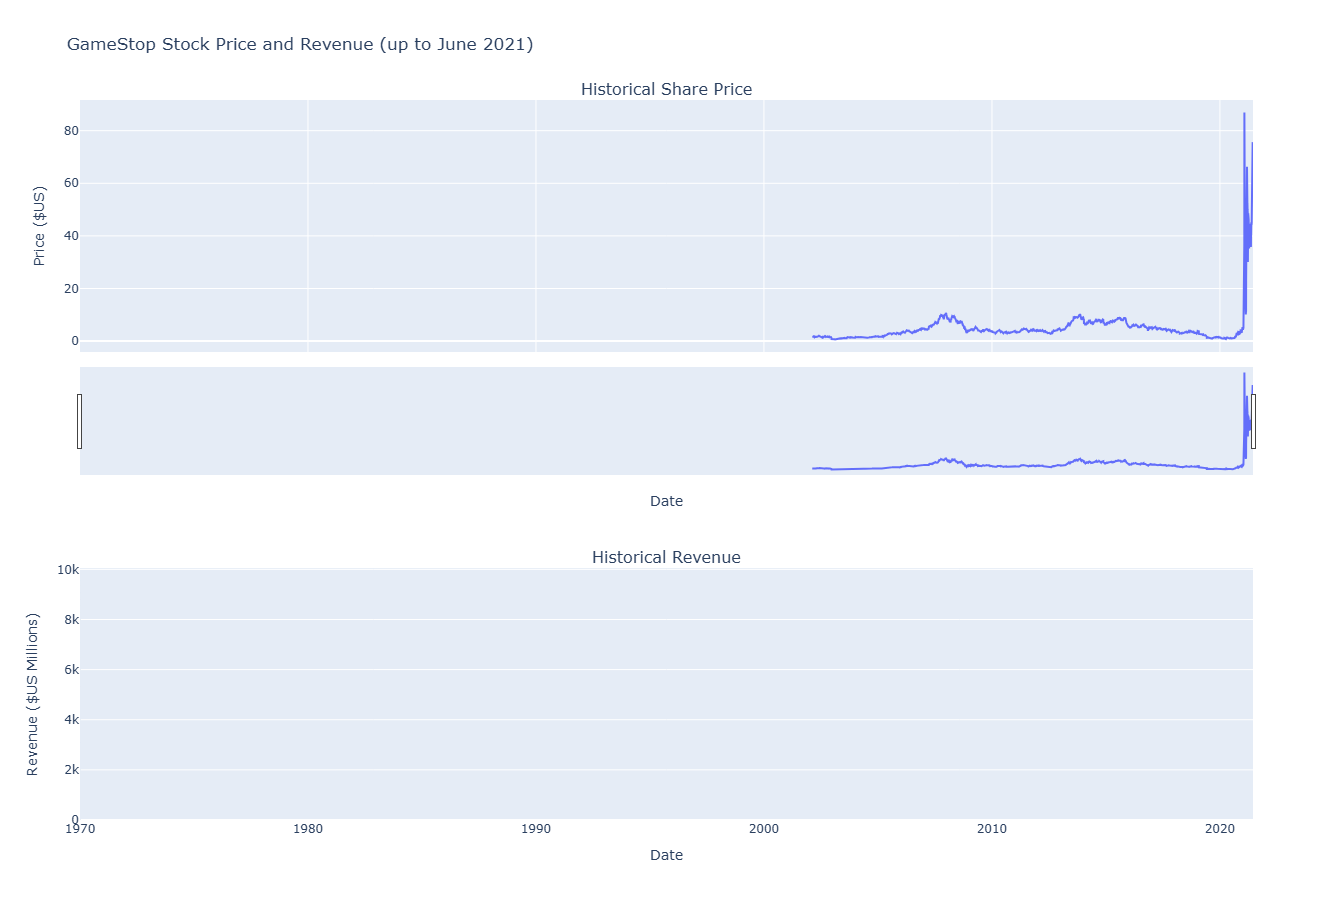

In [24]:
make_graph(gme_data, gme_revenue, 'GameStop')


##  Author
**Yogeshwar Sharma**